## Report

##import libraries

## import libraries

In [9]:

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Data set

In [10]:

dataset=pd.read_csv('construction_cost_estimate_dataset.csv')
print(dataset)

     Project_ID  Area_sqft  Floors Material_Quality Location_Type  \
0         C0001       7770       2           Medium      Suburban   
1         C0002       1360       5              Low         Rural   
2         C0003       5890       1           Medium      Suburban   
3         C0004       5691       2             High         Urban   
4         C0005       6234       1             High      Suburban   
...         ...        ...     ...              ...           ...   
4995      C4996       5177       1           Medium      Suburban   
4996      C4997       7711       4             High      Suburban   
4997      C4998       3145       2           Medium      Suburban   
4998      C4999       8710       3           Medium         Urban   
4999      C5000       9816       1           Medium         Urban   

      Labor_Cost_per_sqft  Material_Cost_per_sqft  Design_Complexity  \
0                     259                     413                 10   
1                     188  

# features

In [11]:
print(dataset.columns) 

Index(['Project_ID', 'Area_sqft', 'Floors', 'Material_Quality',
       'Location_Type', 'Labor_Cost_per_sqft', 'Material_Cost_per_sqft',
       'Design_Complexity', 'Duration_months', 'Total_Cost'],
      dtype='object')


## String Data

In [12]:
print(dataset[['Material_Quality']].head)
print(dataset[['Location_Type']].head)


<bound method NDFrame.head of      Material_Quality
0              Medium
1                 Low
2              Medium
3                High
4                High
...               ...
4995           Medium
4996             High
4997           Medium
4998           Medium
4999           Medium

[5000 rows x 1 columns]>
<bound method NDFrame.head of      Location_Type
0         Suburban
1            Rural
2         Suburban
3            Urban
4         Suburban
...            ...
4995      Suburban
4996      Suburban
4997      Suburban
4998         Urban
4999         Urban

[5000 rows x 1 columns]>


## LabelEncoder for string value of dataset

In [13]:
from sklearn.preprocessing import LabelEncoder
dataset['Material_Quality']=dataset['Material_Quality'].map({  'High':1.5,'Medium':1,'Low':0.5})
dataset['Location_Type']=dataset['Location_Type'].map({ 'Urban':1,'Suburban':2,'Rural':3})

In [14]:
print(dataset[['Material_Quality']].head)
print(dataset[['Location_Type']].head)


<bound method NDFrame.head of       Material_Quality
0                  1.0
1                  0.5
2                  1.0
3                  1.5
4                  1.5
...                ...
4995               1.0
4996               1.5
4997               1.0
4998               1.0
4999               1.0

[5000 rows x 1 columns]>
<bound method NDFrame.head of       Location_Type
0                 2
1                 3
2                 2
3                 1
4                 2
...             ...
4995              2
4996              2
4997              2
4998              1
4999              1

[5000 rows x 1 columns]>


## Distribute dataset Into dependent and independent

In [49]:
x=dataset[['Area_sqft', 'Floors', 'Material_Quality',
       'Location_Type', 'Labor_Cost_per_sqft', 'Material_Cost_per_sqft',
       'Design_Complexity', 'Duration_months']]
y=dataset['Total_Cost']

In [17]:
x


,Project_ID,Area_sqft,Floors,Material_Quality,Location_Type,Labor_Cost_per_sqft,Material_Cost_per_sqft,Design_Complexity,Duration_months
0,C0001,7770,2,1.0,2,259,413,10,17
1,C0002,1360,5,0.5,3,188,336,8,17
2,C0003,5890,1,1.0,2,159,484,7,9
3,C0004,5691,2,1.5,1,297,270,2,10
4,C0005,6234,1,1.5,2,150,444,2,9
...,...,...,...,...,...,...,...,...,...
4995,C4996,5177,1,1.0,2,239,448,2,17
4996,C4997,7711,4,1.5,2,262,256,2,22
4997,C4998,3145,2,1.0,2,200,209,7,18
4998,C4999,8710,3,1.0,1,217,412,3,4


In [18]:
y

0        7773782.64
1         814906.88
2        4958427.87
3        5460627.94
4        5143898.21
           ...     
4995     4668377.13
4996     5274212.56
4997     1937445.40
4998     6964280.76
4999    10218180.87
Name: Total_Cost, Length: 5000, dtype: float64

#round off  the decimal numbers

In [19]:
y= np.round(y) 
print(y) 


0        7773783.0
1         814907.0
2        4958428.0
3        5460628.0
4        5143898.0
           ...    
4995     4668377.0
4996     5274213.0
4997     1937445.0
4998     6964281.0
4999    10218181.0
Name: Total_Cost, Length: 5000, dtype: float64


### check the null value in dataset 

In [21]:

print(dataset.isnull().values.any()) 

False


## sklearn librarie of train_test_split

In [26]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training data:", x_train.shape)
print("Testing data:", x_test.shape)

Training data: (4000, 8)
Testing data: (1000, 8)


In [27]:
#len(x_test)
# len(y_test)
# len(x_train)
len(y_train)

4000

### import linear regression for x_train, y_train

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
model.coef_

array([ 7.88152455e+02,  3.77843425e+03,  9.53895722e+05, -5.26538979e+05,
        6.88332949e+03,  7.18230825e+03,  7.55552153e+04,  1.74371142e+03])

In [30]:
model.intercept_

np.float64(-4562079.633133096)

In [32]:
y_pred_test= model.predict(x_test)
y_pred_train= model.predict(x_train)


## librarie  matplotlib   for plot the data

In [ ]:
import matplotlib.pyplot as plt 

## scatter plot show  train and test data

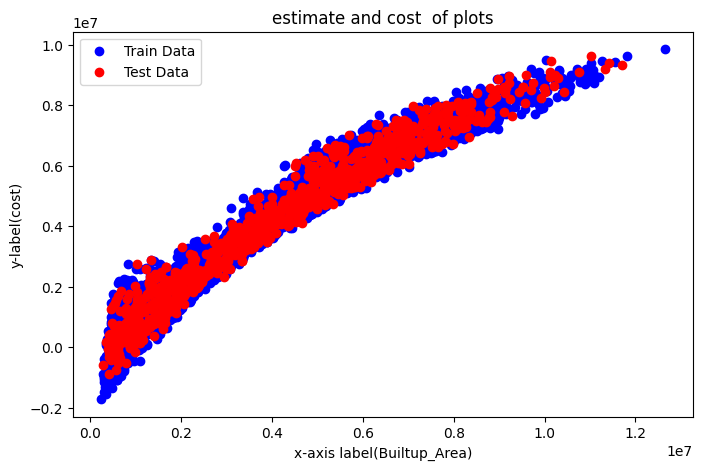

In [34]:
plt.figure(figsize=(8,5))
# plt.scatter(dataset[['Builtup_Area']],dataset['Cost'])
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data')
plt.scatter(y_test, y_pred_test, color='red',label="Test Data")
plt.plot()
plt.xlabel('x-axis label(Builtup_Area)')
plt.ylabel('y-label(cost)')
plt.title('estimate and cost  of plots')
plt.legend()
plt.show()

## scatter plot best fit line

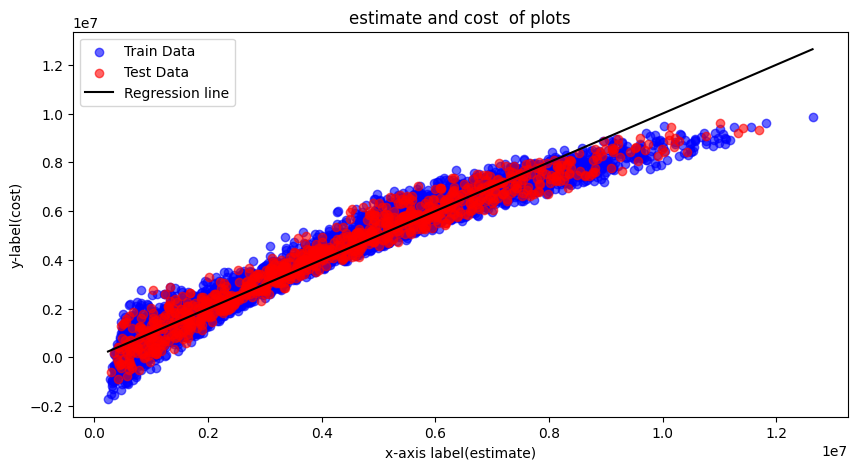

In [35]:
plt.figure(figsize=(10, 5))
# plt.scatter(dataset[['Builtup_Area']],dataset['Cost'])
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black',label='Regression line')
# plt.plot(x,model.predict(x), label='Linear regression')
plt.xlabel('x-axis label(estimate)')
plt.ylabel('y-label(cost)')
plt.title('estimate and cost  of plots')
plt.legend()
plt.show()


## test the module by input data 

## MAE,MSE,RMSE,R2

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# Predictions
y_pred = model.predict(x)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 419636.74
Mean Squared Error (MSE): 309425413848.9141
Root Mean Squared Error (RMSE): 556260.2033661172
R² Score: 0.9459620732769266


## Decision tree 

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_dt))

Decision Tree R²: 0.9297112839490166


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest R²: 0.970244557427264


## SVR

In [41]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# SVR needs scaled data
svr = SVR(kernel='linear')

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svr = SVR(kernel='rbf')
svr.fit(x_train_scaled, y_train)

y_pred_svr = svr.predict(x_test_scaled)

print("SVR R²:", r2_score(y_test, y_pred_svr))


SVR R²: -0.021589396623861834


## All Result of models with MAE

In [47]:
models = {
    "Linear Regression": model,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVR": svr,
    
}

for name, m in models.items():
    y_pred = m.predict(x_test if name != "SVR" else x_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} -> R²: {r2:.3f}, MAE: {mae:.2f}")
   


Linear Regression -> R²: 0.949, MAE: 419226.54
Decision Tree -> R²: 0.930, MAE: 469624.86
Random Forest -> R²: 0.970, MAE: 305889.08
SVR -> R²: -0.022, MAE: 2045572.76


## Graphic represent of all feature with Cost 

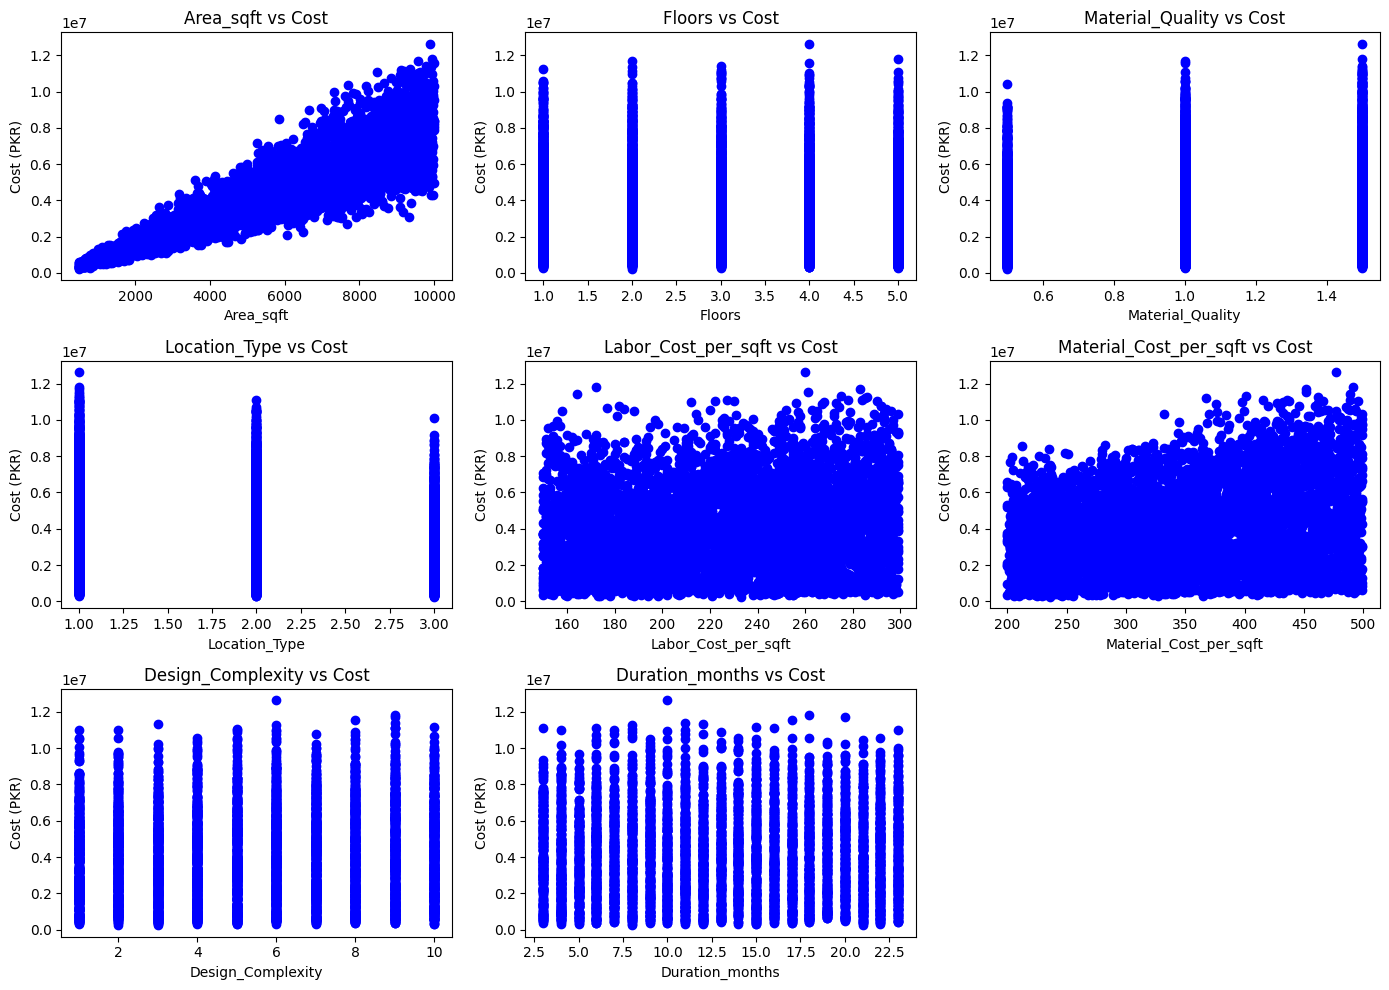

In [46]:
#visualize each features with cost

features = ['Area_sqft', 'Floors', 'Material_Quality',
       'Location_Type', 'Labor_Cost_per_sqft', 'Material_Cost_per_sqft',
       'Design_Complexity', 'Duration_months']

plt.figure(figsize=(14, 10))  # make grid bigger

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.scatter(dataset[feature], dataset['Total_Cost'], color='blue')
    plt.xlabel(feature)
    plt.ylabel('Cost (PKR)')
    plt.title(f'{feature} vs Cost')

plt.tight_layout()
plt.show()
